# The Anscombe's Quartet Database

The purpose of this Jupyter notebook is to anaylse Anscombe's quartet database. There are four tasks to be carried out in this notebook:

1. Explain the background to the dataset – who created it, when it was created, and any speculation you can ﬁnd regarding how it might have been created.
2. Plot the interesting aspects of the database
3. Calculate the descriptive statistics of the variables in the dataset. 
4. Explain why the dataset is interesting, referring to the plots and statistics above.

## Background

The Anscombe's Quartet Database was created by Francis John Anscombe. Anscombe created the Quartet Database in 1973 to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties (ref wiki.)



Anscombe, a mathematician who helped computerize statistical analyses while seeking to avoid flawed interpretations of such data. In using computers to analyze statistical data, he drew on his expertise in the sampling of inspections for industrial quality control, the philosophical foundations of probability and the analysis of variance. (NY Times)


## Plotting the Database

In [78]:
# Import libraires pandas and seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [79]:
# load the example dataset for Anscombe's quartet
data = pd.read_csv('Anscombe.csv')
data

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [80]:
# Print the mean of x
np.mean(data["x1"]) 
np.mean(data["x2"]) 
np.mean(data["x3"]) 
np.mean(data["x4"])

9.0

In [81]:
# Print the mean of y
np.mean(data["y1"]) 
np.mean(data["y2"]) 
np.mean(data["y3"]) 
np.mean(data["y4"])

7.50090909090909

In [82]:
# Print the standard deviation of x
print("Standard Deviation of X1:\t %f" % np.std(data["x1"]))
print("Standard Deviation of X2:\t %f" % np.std(data["x2"]))
print("Standard Deviation of X3:\t %f" % np.std(data["x3"]))
print("Standard Deviation of X4:\t %f" % np.std(data["x4"]))

Standard Deviation of X1:	 3.162278
Standard Deviation of X2:	 3.162278
Standard Deviation of X3:	 3.162278
Standard Deviation of X4:	 3.162278


In [83]:
# Print the standard deviation of y
print("Standard Deviation of Y1:\t %f" % np.std(data["y1"]))
print("Standard Deviation of Y2:\t %f" % np.std(data["y2"]))
print("Standard Deviation of Y3:\t %f" % np.std(data["y3"]))
print("Standard Deviation of Y4:\t %f" % np.std(data["y4"]))

Standard Deviation of Y1:	 1.937024
Standard Deviation of Y2:	 1.937109
Standard Deviation of Y3:	 1.935933
Standard Deviation of Y4:	 1.936081


In [87]:
# Print dataset in table format beginning at 2nd column usig panda
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

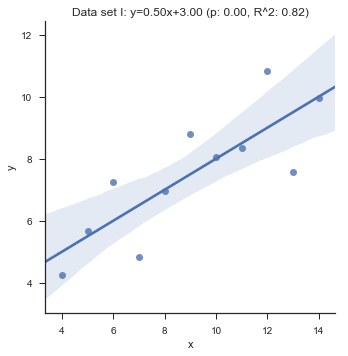

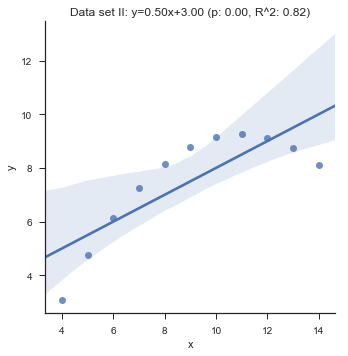

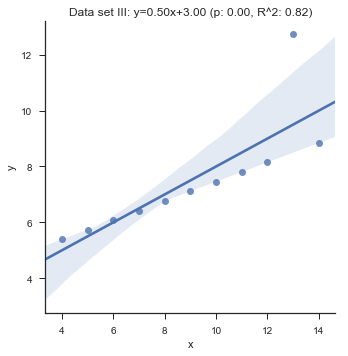

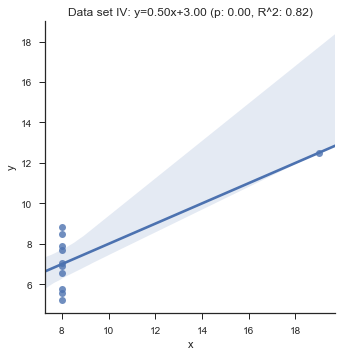

In [88]:
# Show the results of a linear regression within each dataset
data = sns.load_dataset("anscombe")
for data_set in anscombe.dataset.unique():
     df = anscombe.query("dataset == '{}'".format(data_set))
     slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=df.x, y=df.y)
     sns.lmplot(x="x", y="y", data=df);
     plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val))
     plt.show()

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed.Each dataset consists of eleven (x,y) points (wiki)